In [1]:
# Import Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#render matplotlib images in the same window
%matplotlib inline

In [2]:
# Video Capture
cap = cv2.VideoCapture('Video/chaplin.mp4')

In [3]:
# Read the capture and get the first frame
ret, first_frame = cap.read()

In [4]:
# Convert frame to Grayscale
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

In [6]:
# Create an image with the same dimensions as the frame for later drawing purposes
# mask = np.zeros(first_frame)
mask = np.zeros_like(first_frame)

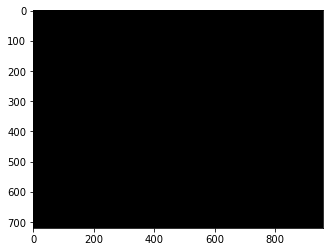

In [7]:
plt.imshow(mask)

In [8]:
# Saturation to maximum
mask[..., 1] = 255

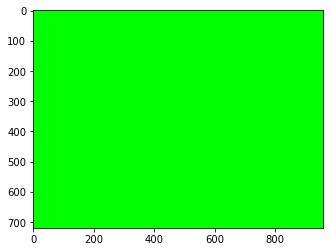

In [9]:
plt.imshow(mask)

In [10]:
# While loop
while(cap.isOpened()):

    # Read the capture and get the first frame
    ret, frame = cap.read()
    
    # Open new window and display the input frame
    cv2.imshow('input', frame)
    
    # Convert all frame to Grayscale (previously we did only the first frame)
    # redundant for gray image frames
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate dense optical flow by Farneback
    flow = cv2.calcOpticalFlowFarneback(prev_gray,
                                       gray,
                                       None,
                                       0.5,
                                       3,
                                       15,
                                       3,
                                       5,
                                       1.2,
                                       0)    
    # Compute Magnitude and Angle
    magn, angle = cv2.cartToPolar(flow[..., 0],
                                  flow[..., 1])
    
    # Set image hue depanding on the optical flow direction
    mask[..., 0] = angle * 180/np.pi/2
        
    # Normalize the magnitude
    mask[...,2] = cv2.normalize(magn,
                                None,
                                0,
                                255,
                                cv2.NORM_MINMAX)
    
    # Convert HSV to RGB
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
    
    # Open new window and display the output
    cv2.imshow('Dense Optical Flow', rgb)
    
    # Update previous frame
    prev_gray = gray
    
    # Close the frame
    if cv2.waitKey(30) & 0xFF == ord("q"):
        break
    
# Release and Destroy
cap.release()
cv2.destroyAllWindows()

